## High resolution simulations, 1d output
Exploring the 1-day output files generated by the Salish Sea Atlantis Model
for Scrubber Discharge Project

- scenario 1: 1-year discharge for Jan - Dec 2019

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups
import ssam_plot as splot

### Loading scenario files

In [2]:
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_2019_highres_control/outputSalishSea.nc"
scenario1_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_2019_highres/outputSalishSea.nc"

control = xr.open_dataset(str(control_file), decode_cf=True)
scenario1 = xr.open_dataset(str(scenario1_file), decode_cf=True)

time = np.ma.filled(scenario1.variables['t'], np.nan)

In [3]:
start = 0
end = time.size-1
event_start = np.datetime64('2019-10-05')

In [5]:
scenarios = [scenario1]

Testing time of phenanthrene discharge in the model

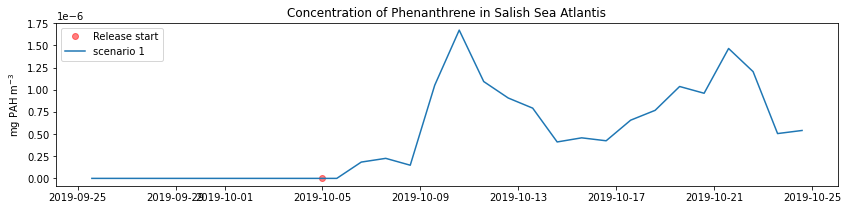

In [6]:
splot.compare_pah('Phenanthrene', scenarios, time, start, end, event_start)

### Compare output across entire model and groups

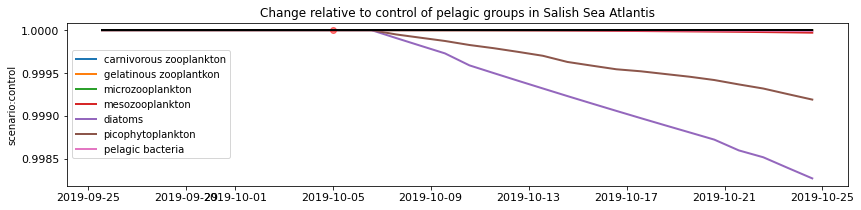

In [7]:
splot.plot_pelagic(groups.plankton,scenario1, control, time, start, end, event_start, y_min=None, y_max=None)

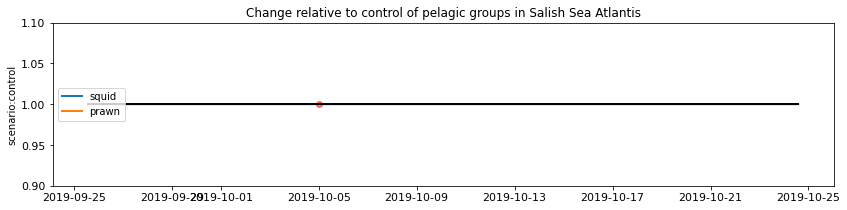

In [11]:
splot.plot_pelagic(groups.pelagic_invertebrates,scenario1, control, time, start, end, event_start, y_min=0.9, y_max=1.1)

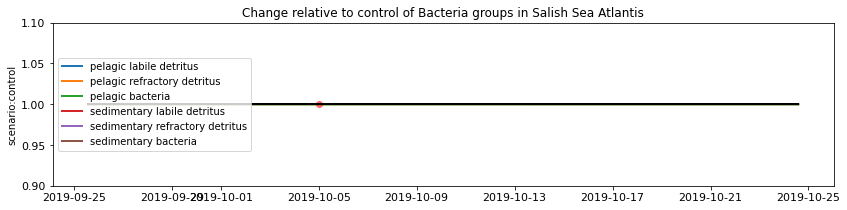

In [14]:
splot.plot_bacteria(scenario1, control, time, start, end, event_start,y_min=0.9, y_max=1.1)

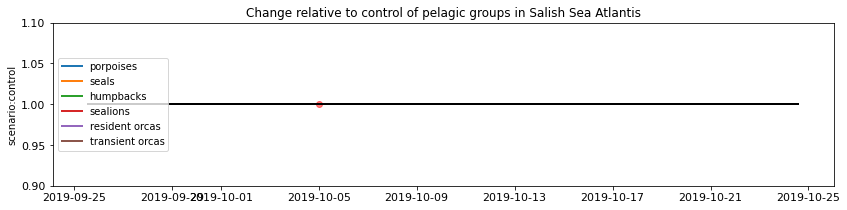

In [16]:
splot.plot_pelagic(groups.mammals,scenario1, control, time, start, end, event_start, y_min=0.9, y_max=1.1)

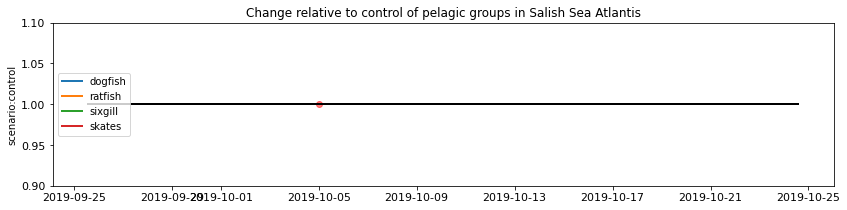

In [17]:
splot.plot_pelagic(groups.sharks,scenario1, control, time, start, end, event_start, y_min=0.9, y_max=1.1)

### BOX 66 - Saanich Inlet

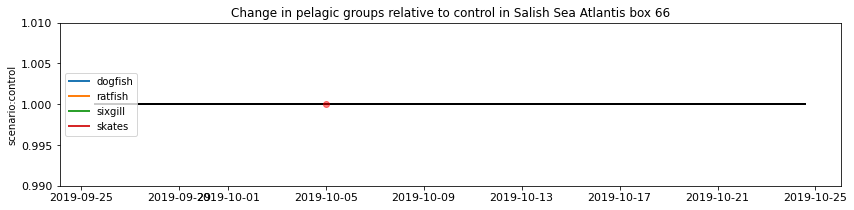

In [19]:
splot.plot_pelagic_box(groups.sharks, scenario1, 66, control, time, start, end, event_start, y_min=0.99, y_max=1.01)

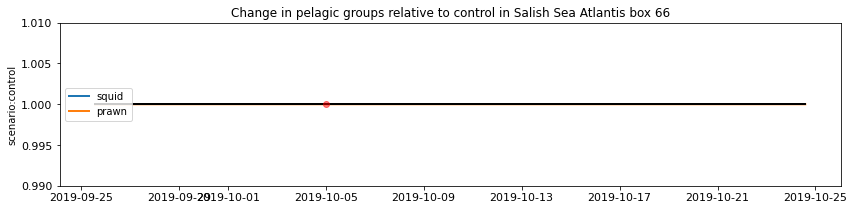

In [20]:
splot.plot_pelagic_box(groups.pelagic_invertebrates, scenario1, 66, control, time, start, end, event_start, y_min=0.99, y_max=1.01)

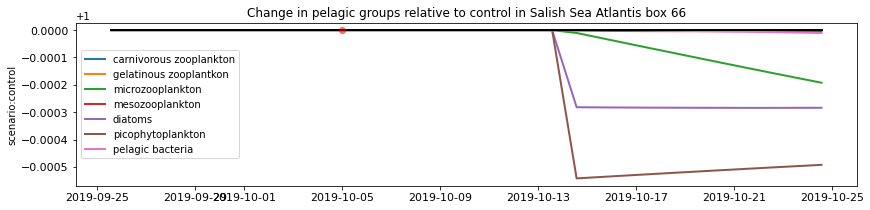

In [22]:
splot.plot_pelagic_box(groups.plankton, scenario1, 66, control, time, start, end, event_start)

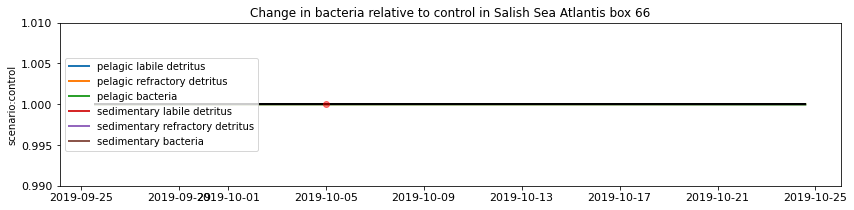

In [24]:
splot.plot_bacteria_box(scenario1, 66, control, time, start, end, event_start, y_min=0.99, y_max=1.01)

### Changes at the spill time, 10, and 20 days after

In [25]:
days = (10, 20, 30)
data_label = {'At time of spill':[],'10 days after':[],'20 days after':[]}

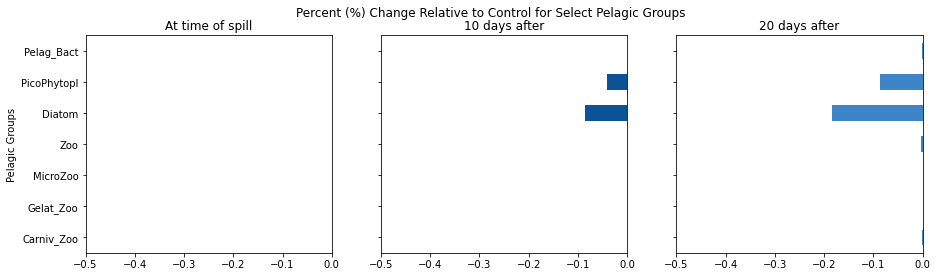

In [29]:
splot.boxplot_pelagic(groups.plankton, scenario1, control, days, data_label, x_lim=-0.5)

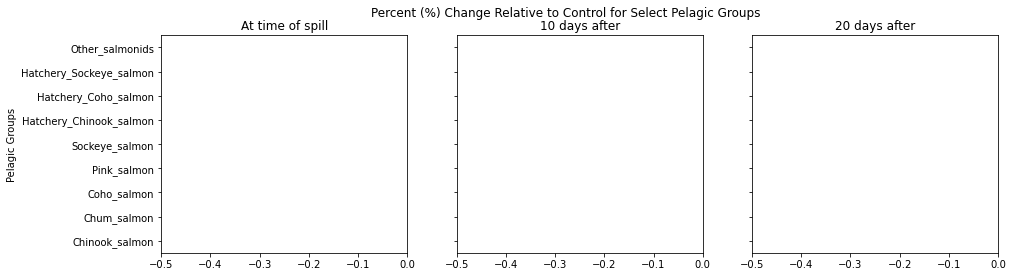

In [33]:
splot.boxplot_pelagic(groups.salmon, scenario1, control, days, data_label, x_lim=-0.5)